In [1]:
import wave
import json
import librosa
import csv
import numpy as np
from pywt import wavedec
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt

2023-10-10 22:37:13.738086: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-10 22:37:13.779944: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-10 22:37:13.780020: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-10 22:37:13.780070: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-10 22:37:13.789646: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-10 22:37:13.790424: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
model_uri = '../modelh5/model_cnn_nontuning.h5'
new_model = tf.keras.models.load_model(model_uri)
new_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 99, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 50, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 48, 32)            6176      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 24, 32)            0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 768)               0         
                                                                 
 dense (Dense)               (None, 64)                4

In [94]:
import wave
import json
header = 'filename'
for i in range(1, 41):
    header += f' mfcc{i}'
header += ' rms'
for i in range(1, 61):
  header += f' cqt{i}'
header += ' label'
header = header.split()
file = open('testing.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)



In [95]:
dataset_path = '../data/testing_10/'

In [96]:
for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:
            semantic_label = dirpath.split("/")[-1]
            print("\nProcessing: {}".format(semantic_label))
            for f in filenames:
                file_path = os.path.join(dirpath, f)
                to_append = f'{file_path}'
                # print(file_path)
                y, sr = librosa.load(file_path, mono=True, duration=3, sr=8000)
                coeffs = wavedec(y, 'db6', level=10)
                cA,cD10,cD9,cD8,cD7,cD6,cD5,cD4,cD3,cD2, cD1 = coeffs
                mfcc = librosa.feature.mfcc(y=cD6, sr=8000, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
                rms = librosa.feature.rms(y=cD6)[0]
                cqt = np.abs(librosa.cqt(y=cD6, sr=sr, n_bins=60)) 
                combined_features = np.concatenate((mfcc, rms.reshape(1, -1), cqt), axis=0)
                to_append = f'{file_path}'
                for e in combined_features:
                    to_append += f' {np.mean(e.T, axis=0)}'
                to_append += f' {semantic_label}'
                file = open('testing.csv', 'a', newline='')
                with file:
                    writer = csv.writer(file)
                    writer.writerow(to_append.split())





Processing: MVP


/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=286
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=286
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=143
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=72
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=36
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input s


Processing: MS


/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=260
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=130
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=65
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=313
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=313
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input 


Processing: N


/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=276
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=276
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=326
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=326
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=274
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for inp


Processing: MR


/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=149
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=75
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=38
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=254
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=254
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input s


Processing: AS


/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=339
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=339
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=170
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=375
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for input signal of length=375
  warnings.warn(
/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=512 is too large for inpu

In [97]:
data = pd.read_csv('./testing.csv')
data.head()

,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60,label
0,../data/testing_10/MVP/New_MVP_135.wav,120.542198,81.032127,-28.827648,15.472630,-13.375639,2.064777,0.645235,5.298680,-1.192605,...,1.199861,1.341047,0.929938,0.183216,0.393451,0.436362,0.132614,0.129953,0.173024,MVP
1,../data/testing_10/MVP/New_MVP_192.wav,169.022171,0.014345,-8.158237,10.943016,-6.761946,3.627834,3.756681,-2.679920,6.400948,...,1.000992,1.227666,1.223084,0.911022,0.833514,1.206899,1.630144,1.685614,1.430485,MVP
2,../data/testing_10/MVP/New_MVP_179.wav,9.991525,-14.992125,-16.659719,1.284567,2.789160,-6.327169,2.227296,-7.799865,-0.702797,...,0.127367,0.148441,0.180693,0.192552,0.174160,0.164109,0.203739,0.212714,0.125976,MVP
3,../data/testing_10/MVP/New_MVP_165.wav,88.365685,75.461258,-28.708597,12.922665,0.968912,8.228060,-1.413278,3.110880,-5.817666,...,0.607429,0.513478,0.185527,0.362009,0.676364,0.709675,0.445348,0.086817,0.359133,MVP
4,../data/testing_10/MVP/New_MVP_024.wav,113.334900,-69.423416,16.758776,8.050084,-18.435514,11.386729,-4.898197,2.571638,-11.734188,...,0.331728,0.336712,0.303234,0.209753,0.120485,0.134958,0.137306,0.142991,0.283220,MVP


In [98]:
X = data.drop(['label', 'filename'], axis=1)
y = data.iloc[:, -1]

In [99]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
model = tf.keras.models.load_model(model_uri)
pred = model.predict(X)
hasil = []
class_labels = ['AS', 'MR', 'MS', 'MVP', 'N']
# class_labels = ['MVP', 'MS', 'N', 'MR', 'AS']
for i in pred:
    # hasil.append(np.argmax(i))
    print('===')
    print(i)
    cek = np.argmax(i)
    print(f'Actual class: {cek}')
    print(f'Predicted class: {class_labels[cek]}')
    print('===')
    hasil.append(class_labels[cek])
y_p = np.argmax(pred, axis=1)


4/4 [==============================] - 0s 2ms/step
===
[0.01247421 0.00949651 0.00208478 0.97485715 0.00108728]
Actual class: 3
Predicted class: MVP
===
===
[0.2653286  0.6198818  0.0040682  0.10255235 0.00816903]
Actual class: 1
Predicted class: MR
===
===
[0.32813323 0.36887404 0.03816962 0.0794625  0.1853606 ]
Actual class: 1
Predicted class: MR
===
===
[1.7050207e-03 2.4318115e-03 6.5305788e-04 9.9452323e-01 6.8678398e-04]
Actual class: 3
Predicted class: MVP
===
===
[0.02403247 0.05749445 0.00824055 0.88952774 0.02070478]
Actual class: 3
Predicted class: MVP
===
===
[0.00630539 0.00424039 0.00945004 0.97888076 0.00112339]
Actual class: 3
Predicted class: MVP
===
===
[0.0115838  0.04854207 0.00123152 0.47742066 0.461222  ]
Actual class: 3
Predicted class: MVP
===
===
[3.6665252e-03 5.4800264e-03 4.7242330e-04 9.8623687e-01 4.1440194e-03]
Actual class: 3
Predicted class: MVP
===
===
[0.02019748 0.1390733  0.02725258 0.75265855 0.06081799]
Actual class: 3
Predicted class: MVP
===
===

In [100]:
cm = confusion_matrix(y, hasil)
cm

array([[19,  1,  0,  0,  0],
       [ 0, 16,  1,  3,  0],
       [ 0,  3, 15,  2,  0],
       [ 0,  2,  0, 17,  1],
       [ 1,  1,  0,  0, 18]])

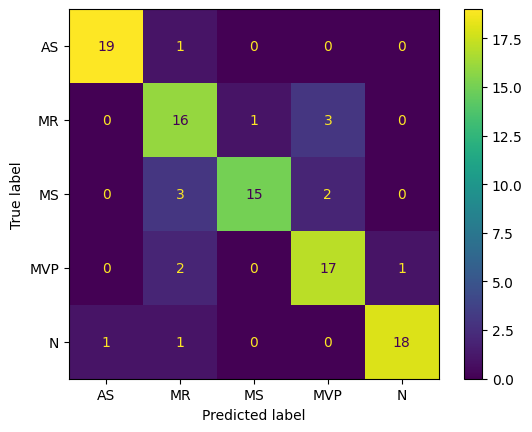

In [101]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['AS', 'MR', 'MS', 'MVP', 'N'])
disp.plot()
plt.show()

In [102]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [103]:
print("TNR :" , TNR)
print("TPR :" , TPR)
print("FPR :" , FPR)
print("FNR :" , FNR)
print("ACC :" , ACC)
print("PPV :" , PPV)
print("NPV :" , NPV)
print("FDR :" , FDR)


TNR : [0.9875 0.9125 0.9875 0.9375 0.9875]
TPR : [0.95 0.8  0.75 0.85 0.9 ]
FPR : [0.0125 0.0875 0.0125 0.0625 0.0125]
FNR : [0.05 0.2  0.25 0.15 0.1 ]
ACC : [0.98 0.89 0.94 0.92 0.97]
PPV : [0.95       0.69565217 0.9375     0.77272727 0.94736842]
NPV : [0.9875     0.94805195 0.94047619 0.96153846 0.97530864]
FDR : [0.05       0.30434783 0.0625     0.22727273 0.05263158]
